/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 430.3631 - mse: 430.3631 - val_loss: 50.8353 - val_mse: 50.8353
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 44.9177 - mse: 44.9177 - val_loss: 49.0240 - val_mse: 49.0240
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 42.1965 - mse: 42.1965 - val_loss: 56.3983 - val_mse: 56.3983
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 47.5200 - mse: 47.5200 - val_loss: 49.0974 - val_mse: 49.0974
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.8289 - mse: 45.8289 - val_loss: 49.6070 - val_mse: 49.6070
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.3901 - mse: 45.3901 - val_loss: 47.0901 - val_mse: 47.0901
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.2109 - mse: 42.2109 - val_loss: 47.0984 - val_mse: 47.0984
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.3493 - mse: 44.3493 - val_loss: 48.9172 - val_mse: 48.9172
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━

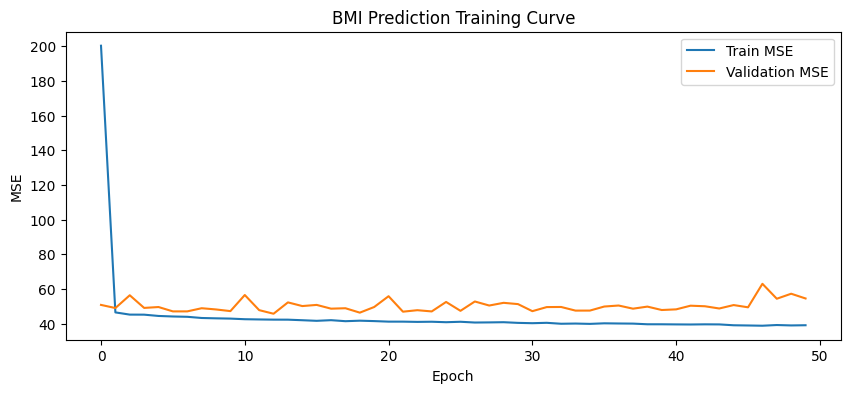

[Test Result] Loss(MSE): 57.390 | Metric MSE: 57.390
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== Sample Predictions ===
실제: 32.90, 예측: 33.39
실제: 31.40, 예측: 27.11
실제: 32.10, 예측: 35.52
실제: 26.90, 예측: 30.12
실제: 22.20, 예측: 33.91
실제: 27.20, 예측: 31.85
실제: 24.50, 예측: 29.14
실제: 43.80, 예측: 35.81
실제: 24.80, 예측: 34.08
실제: 24.00, 예측: 34.96


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# 1) 데이터 불러오기
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")

# bmi 결측치 제거 (단순 drop, 다른 전략도 가능)
df = df.dropna(subset=["bmi"])

# Feature / Target 분리
X = df.drop(columns=["id", "bmi"])
y = df["bmi"]

# -----------------------------
# 2) 전처리 정의 (스케일링 + 원핫인코딩)
# -----------------------------
categorical = X.select_dtypes(include=["object"]).columns.tolist()
numeric = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])

# -----------------------------
# 3) Train/Test 분리
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 전처리 적용
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# numpy array 변환
X_train_np = X_train_prep.toarray() if hasattr(X_train_prep, "toarray") else np.array(X_train_prep)
X_test_np  = X_test_prep.toarray()  if hasattr(X_test_prep, "toarray")  else np.array(X_test_prep)
y_train_np = np.array(y_train)
y_test_np  = np.array(y_test)

# -----------------------------
# 4) 딥러닝 회귀 모델 정의
# -----------------------------
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_np.shape[1],)),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1)  # 연속값 출력 (bmi 예측)
])

model.compile(optimizer="rmsprop",
              loss="mse",   # 요구사항: MSE 손실
              metrics=["mse"])
model.summary()

history = model.fit(
    X_train_np, y_train_np,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# -----------------------------
# 6) 학습곡선 시각화
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("BMI Prediction Training Curve")
plt.show()

# -----------------------------
# 7) 최종 평가 (Test Set)
# -----------------------------
test_loss, test_mse = model.evaluate(X_test_np, y_test_np, verbose=0)
print(f"[Test Result] Loss(MSE): {test_loss:.3f} | Metric MSE: {test_mse:.3f}")

# -----------------------------
# 8) 예측 결과 확인
# -----------------------------
y_pred = model.predict(X_test_np)

print("\n=== Sample Predictions ===")
for i in range(10):
    print(f"실제: {y_test_np[i]:.2f}, 예측: {y_pred[i][0]:.2f}")





